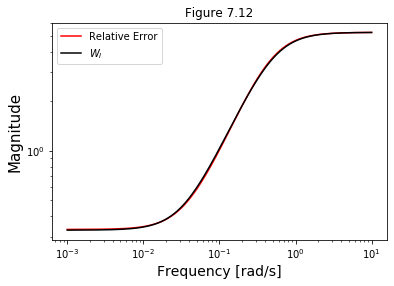

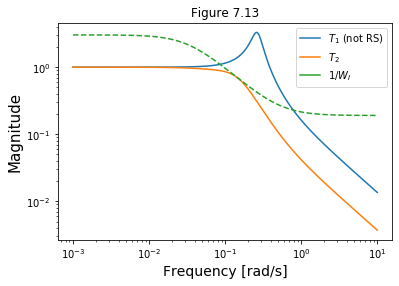

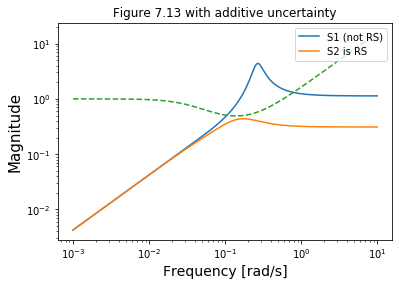

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def G_nom(s):
    return 3 * (-2 * s + 1) / ((5 * s + 1) * (10 * s + 1))


def K(s, kc):
    return kc * (12.7 * s + 1) / (12.7 * s)


def W_I(s):
    return (10 * s + 0.33) / ((10 / 5.25) * s + 1)


def G_p(s):
    return 4 * (-3 * s + 1) / ((4 * s + 1) ** 2)


def l_I(G_p, G_nom):
    return np.abs((G_p - G_nom) / G_nom)


def T(G, K):
    return (G * K) / (1 + G * K)

""" Compute for additive parametric uncertainty
    The condition for robust stability is derived & gives: RS <==> K*S < 1/W_A
    with Lp = Gp*K = k*(G + W_A*delta_I)"""


def l_A(G_p, G_nom):     # We take W_A = l_A , Additive error (l_A = G'- G)
    return np.abs(G_p - G_nom)


def S(G, K):
    return 1/(1 + G*K)

w = np.logspace(-3, 1, 300)
s = 1j*w

plt.figure(0)
plt.loglog(w, l_I(G_p(s), G_nom(s)), 'r', label='Relative Error')
plt.loglog(w, np.abs(W_I(s)), 'k', label='$W_I$')
plt.title(r'Figure 7.12')
plt.xlabel(r'Frequency [rad/s]', fontsize=14)
plt.ylabel(r'Magnitude', fontsize=15)
plt.legend()

# Plotting with multiplicative uncertainty
plt.figure(1)
plt.loglog(w, np.abs(T(G_nom(s), K(s, 1.13))), label='$T_1$ (not RS)')
plt.loglog(w, np.abs(T(G_nom(s), K(s, 0.31))), label='$T_2$')
line = plt.loglog(w, 1/np.abs(W_I(s)), label='$1/W_I$')
plt.title(r'Figure 7.13')
plt.xlabel(r'Frequency [rad/s]', fontsize=14)
plt.ylabel(r'Magnitude', fontsize=15)
plt.legend()
plt.setp(line, linestyle='--')

# Plotting with additive uncertainty
plt.figure(2)
plt.loglog(w, K(s, 1.13)*np.abs(S(G_nom(s), K(s, 1.13))))
plt.loglog(w, K(s, 0.31)*np.abs(S(G_nom(s), K(s, 0.31))))
line = plt.loglog(w, 1/np.abs(l_A(G_p(s), G_nom(s))))
plt.title(r'Figure 7.13 with additive uncertainty')
plt.xlabel(r'Frequency [rad/s]', fontsize=14)
plt.ylabel(r'Magnitude', fontsize=15)
plt.legend(('S1 (not RS)', 'S2 is RS'), loc=1)
plt.setp(line, linestyle='--')

plt.show()
